<a href="https://colab.research.google.com/github/sri-sudha14/Machine-Learning/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction**

In [ ]:
import pandas as pd
import numpy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [ ]:
data = pd.read_csv("salary.csv")

In [ ]:
print(data.shape)
print(data.head())

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [ ]:
income_set = set(data['income'])
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(data.head(10))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0
5   34              9             0              45       0
6   38              6             0              40       0
7   74             16             0              20       1
8   68              9             0              40       0
9   41             10             0              60       1


In [ ]:
X = data.iloc[:,:-1].values

In [ ]:
Y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 ,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean error')

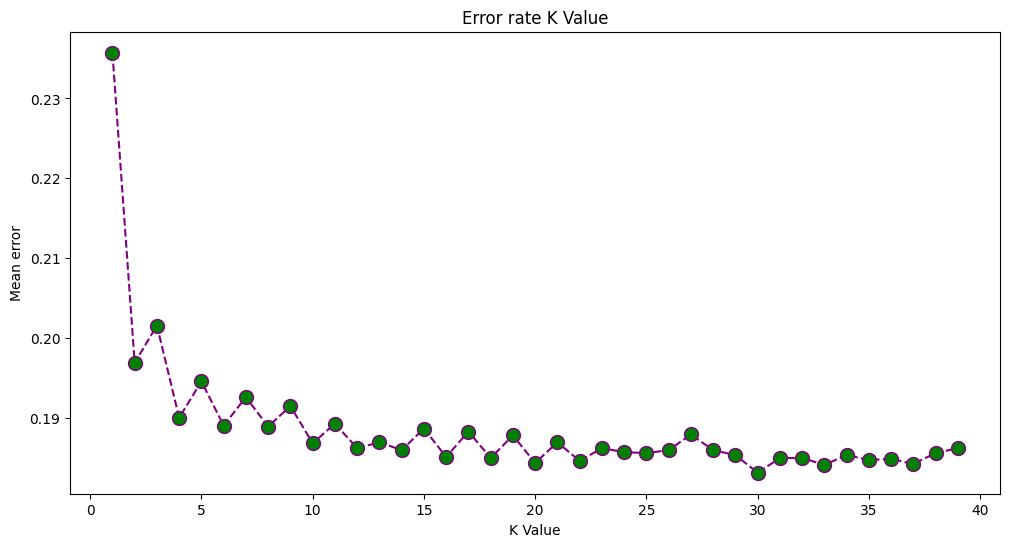

In [ ]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as pyp

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(numpy.mean(pred_i != y_test))

pyp.figure(figsize=(12,6))
pyp.plot(range(1, 40), error, color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
pyp.title('Error rate K Value')
pyp.xlabel('K Value')
pyp.ylabel('Mean error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6, metric= 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
age = int(input("Enter employee's age: "))
ed = int(input("Enter employee's education: "))
gain = int(input("Enter employee's capital gain: "))
work = int(input("Enter employee's work hour per week: "))
newEmp = [[age, ed, gain, work]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 0:
  print("Employee won't get salary more than 50k")
elif result == 1:
  print("Employee will get salary more than 50k")


Enter employee's age: 21
Enter employee's education: 16
Enter employee's capital gain: 70
Enter employee's work hour per week: 70
[1]
Employee will get salary more than 50k
